### Example of DMs: Application to digits dataset 

In [36]:
# Imports
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%run dm.ipynb # own implementation

In [32]:
# Load dataset and save variables
digits = load_digits(n_class=3)
X, y = digits.data, digits.target

# Standardize the data (optional but often recommended)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### My implementation

##### Find optimal epsilon

In [5]:
n_epss = 17
epss = [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10, 25, 50, 75, 100]

n_samples = X.shape[0]
Ls = np.zeros(n_epss)

for cnt, eps in enumerate(epss):
    result = np.zeros((n_samples,n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            a = X[i,:]
            b = X[j,:]
            dist = np.linalg.norm(a-b)
            result[i,j] = np.exp(-(dist)**2/(2*eps**2))

    Ls[cnt] = result.sum()

    print(f"{100*cnt/n_epss}%")

0.0%
5.882352941176471%
11.764705882352942%
17.647058823529413%
23.529411764705884%
29.41176470588235%
35.294117647058826%
41.1764705882353%
47.05882352941177%
52.94117647058823%
58.8235294117647%
64.70588235294117%
70.58823529411765%
76.47058823529412%
82.3529411764706%
88.23529411764706%
94.11764705882354%


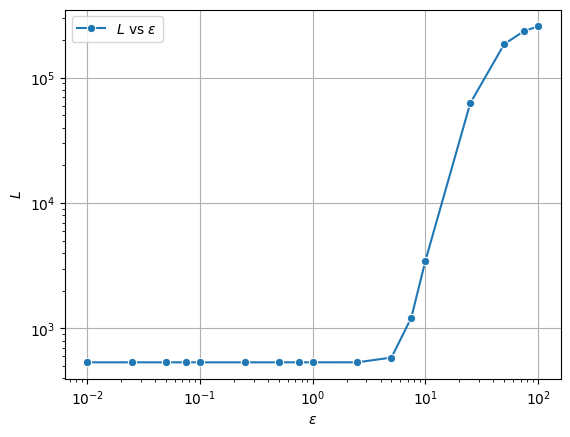

In [12]:
# Loglog plot
f, ax = plt.subplots()
sns.lineplot(data=pd.DataFrame(data={'eps':epss, 'L':Ls}), x='eps', y='L', marker='o', label='$L$ vs $\epsilon$')
ax.grid(visible=True)
ax.set(xscale='log', yscale='log')
ax.set(xlabel='$\epsilon$', ylabel='$L$')
ax.legend()
plt.show()

#### My implementation without standardization (exponential kernel and polynomial kernel)

In [39]:
# Define parameters
dim = 2

# Call DMs method with exponential kernel
_, _, diffusion_coords_exp = get_diffusion_map(X, dim, kernel='exp', epsilon=20, plot_eigenvalues=False, t=1)

# Call DMs method with polynomial kernel
_, _, diffusion_coords_polynom = get_diffusion_map(X, dim, kernel='polynom', d=2, plot_eigenvalues=False, t=1)

Run diffusion maps algorithm with an exponential kernel (eps=20) and t=1
Run diffusion maps algorithm with a polynomial kernel (d=2) and t=1


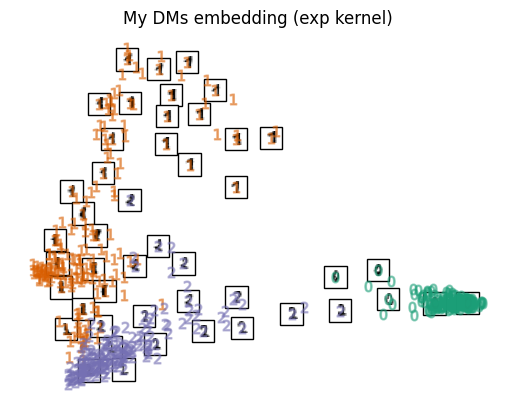

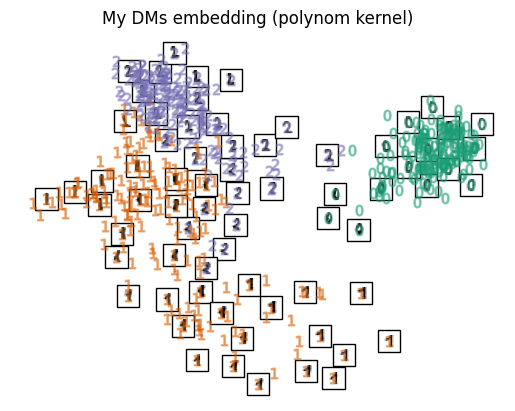

In [40]:
# Plot Dms embedding for exponential kernel
plot_embedding(np.real(diffusion_coords_exp), "My DMs embedding (exponential kernel)")

# Plot Dms embedding for polynomial kernel
plot_embedding(np.real(diffusion_coords_polynom), "My DMs embedding (polynomial kernel)")

#### My implementation with standardization (exponential kernel and polynomial kernel)

In [42]:
# Define parameters
dim = 2

# Call DMs method with exponential kernel
_, _, diffusion_coords_std_exp = get_diffusion_map(X_std, dim, kernel='exp', epsilon=20, plot_eigenvalues=False, t=1)

# Call DMs method with polynomial kernel
_, _, diffusion_coords_std_polynom = get_diffusion_map(X_std, dim, kernel='polynom', d=2, plot_eigenvalues=False, t=1)

Run diffusion maps algorithm with an exponential kernel (eps=20) and t=1
Run diffusion maps algorithm with a polynomial kernel (d=2) and t=1


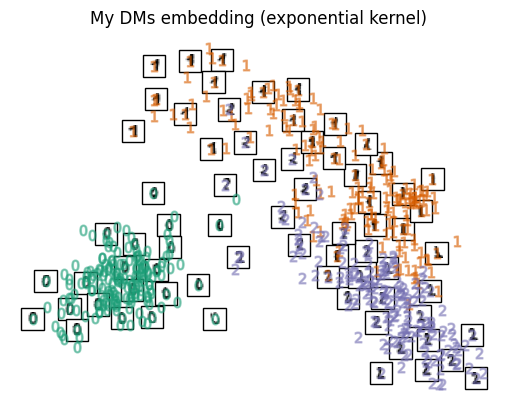

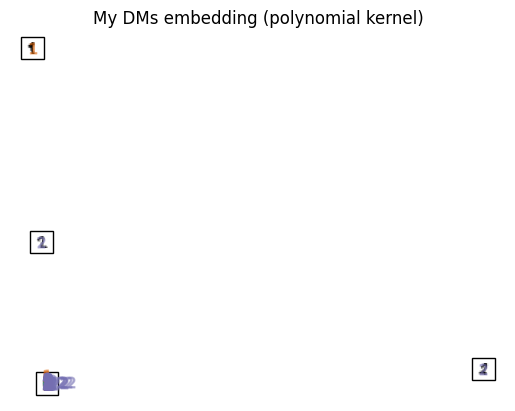

In [43]:
# Plot Dms embedding for exponential kernel
plot_embedding(np.real(diffusion_coords_std_exp), "My DMs embedding (exponential kernel)")

# Plot Dms embedding for polynomial kernel
plot_embedding(np.real(diffusion_coords_std_polynom), "My DMs embedding (polynomial kernel)")